In [1]:
import pandas as pd

In [59]:
import matplotlib.pyplot as plt

In [127]:
import seaborn as sns

In [129]:
# Load the dataset
data = pd.read_csv('depression_data.csv')

In [130]:
# Display the first few rows of the dataset
data.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [133]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

In [135]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [139]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
outliers = data[numerical_columns].describe()
outliers

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [141]:
# Filter data for individuals with history of mental illness or family history of depression
high_depression_indicators_df = df[(df['History of Mental Illness'] == 'Yes') | (df['Family History of Depression'] == 'Yes')]

# Display the first few rows of the filtered dataset
print("First 5 rows of the filtered dataset:")
print(high_depression_indicators_df.head())

First 5 rows of the filtered dataset:
                  Name  Age Marital Status    Education Level  \
0     Christine Barker   31        Married  Bachelor's Degree   
1     Jacqueline Lewis   55        Married        High School   
2       Shannon Church   78        Widowed    Master's Degree   
4         Michael Rich   18         Single        High School   
9  Alexander Hernandez   77        Married  Bachelor's Degree   

   Number of Children Smoking Status Physical Activity Level  \
0                   2     Non-smoker                  Active   
1                   1     Non-smoker               Sedentary   
2                   1     Non-smoker               Sedentary   
4                   0     Non-smoker               Sedentary   
9                   2     Non-smoker               Sedentary   

  Employment Status     Income Alcohol Consumption Dietary Habits  \
0        Unemployed   26265.67            Moderate       Moderate   
1          Employed   42710.36                Hi

In [143]:
# Display basic information about the cleaned dataset
print("\nBasic Information (Cleaned):")
print(data.info())


Basic Information (Cleaned):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Men

In [145]:
# Save the cleaned dataset to a new CSV file
data.to_csv("cleaned_depression_data.csv", index=False)

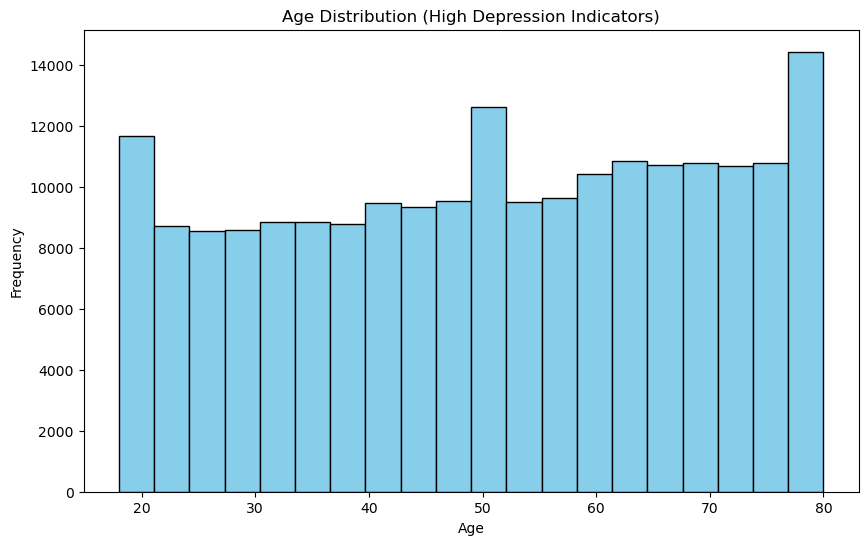

In [147]:
# Histogram for Age Distribution (High Depression Indicators)
plt.figure(figsize=(10, 6))
plt.hist(high_depression_indicators_df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution (High Depression Indicators)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

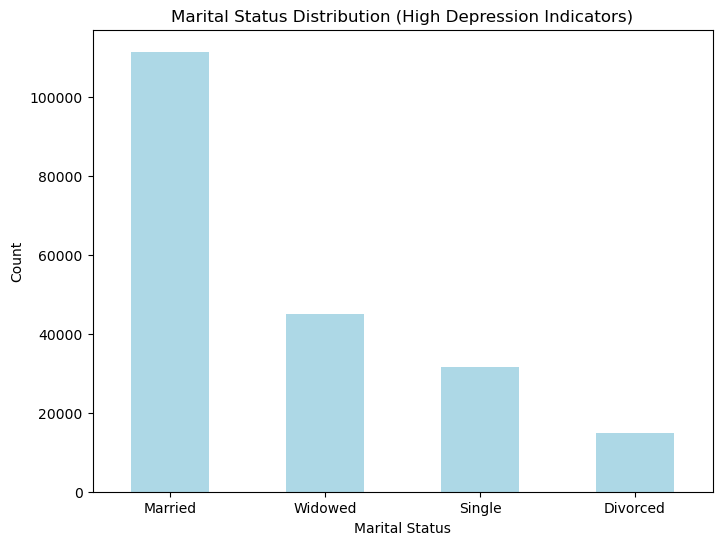

In [165]:
# Bar chart for Marital Status Distribution (High Depression Indicators)
marital_status_counts = high_depression_indicators_df['Marital Status'].value_counts()

plt.figure(figsize=(8, 6))
marital_status_counts.plot(kind='bar', color='lightblue')
plt.title('Marital Status Distribution (High Depression Indicators)')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

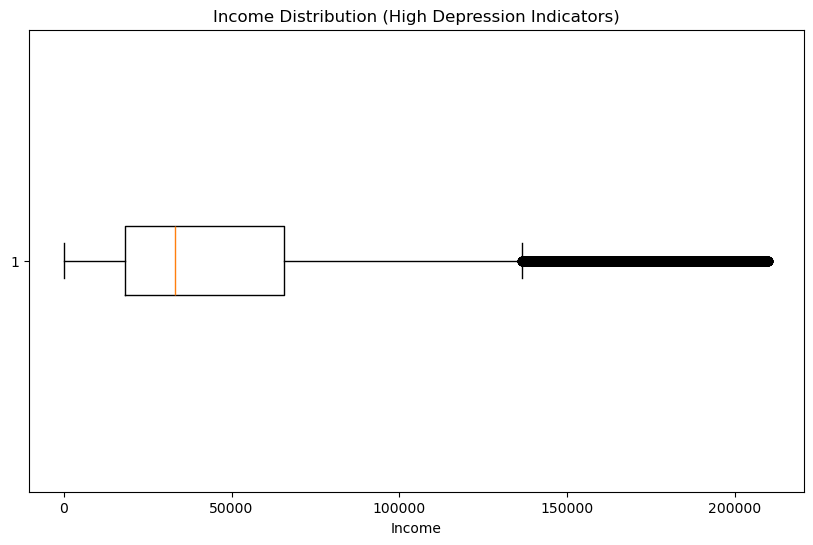

In [167]:
# Box plot for Income Distribution (High Depression Indicators)
plt.figure(figsize=(10, 6))
plt.boxplot(high_depression_indicators_df['Income'], vert=False)
plt.title('Income Distribution (High Depression Indicators)')
plt.xlabel('Income')
plt.show()

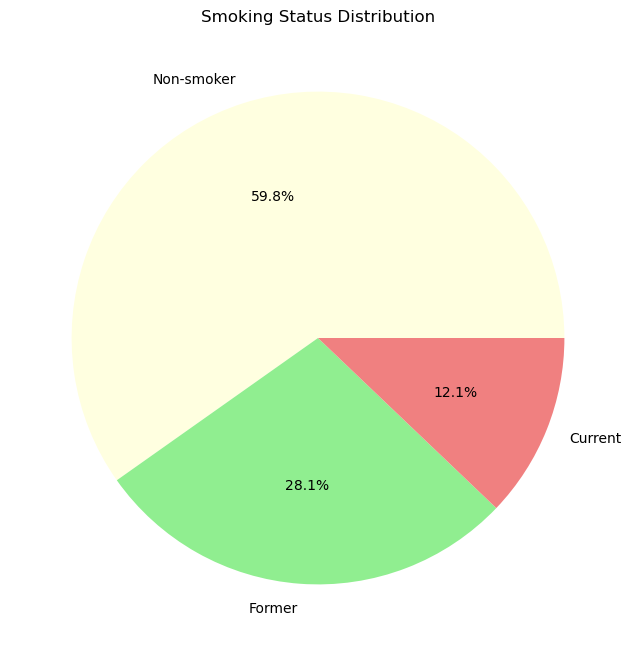

In [153]:
# Pie chart for Smoking Status Distribution
smoking_status_counts = df['Smoking Status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(smoking_status_counts, labels=smoking_status_counts.index, autopct='%1.1f%%', colors=['lightyellow','lightgreen', 'lightcoral'])
plt.title('Smoking Status Distribution')
plt.show()

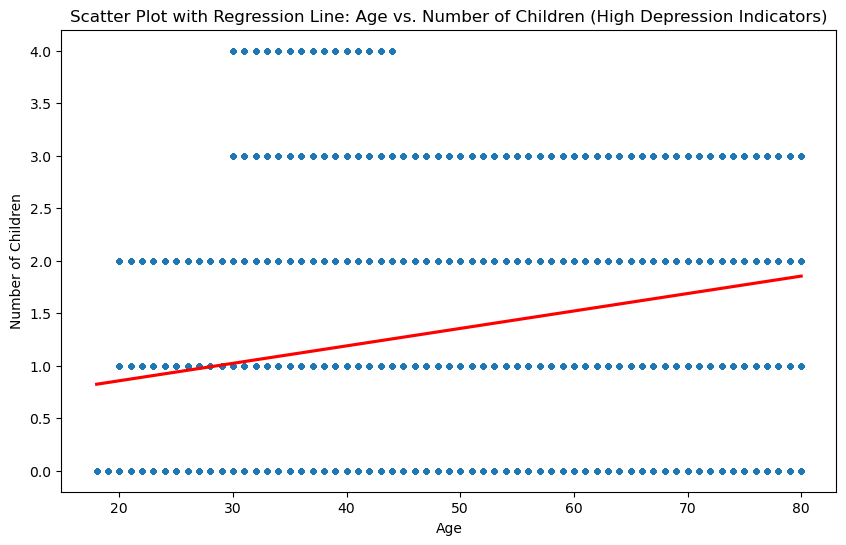

In [157]:
# Scatter Plot for Age and Number of Children (High Depression Indicators)
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Number of Children', data=high_depression_indicators_df, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('Scatter Plot with Regression Line: Age vs. Number of Children (High Depression Indicators)')
plt.xlabel('Age')
plt.ylabel('Number of Children')
plt.show()

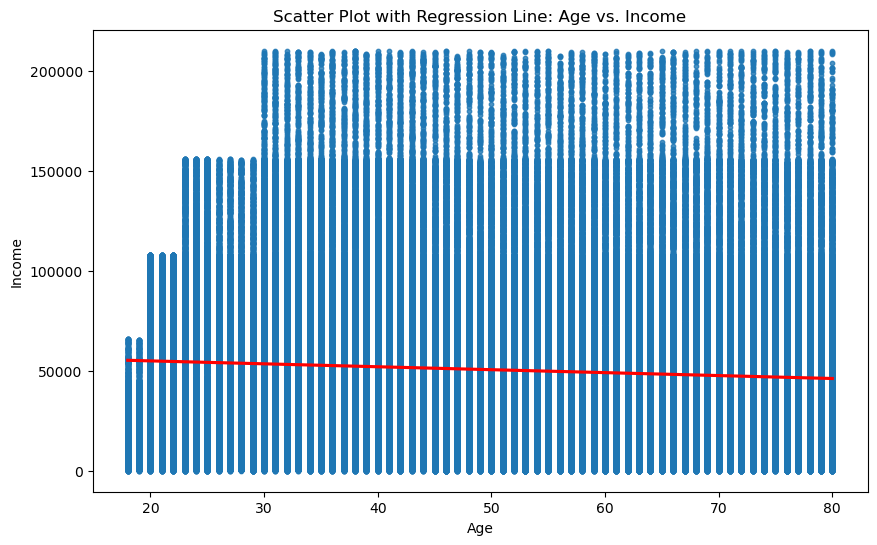

In [109]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Income', data=df, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('Scatter Plot with Regression Line: Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

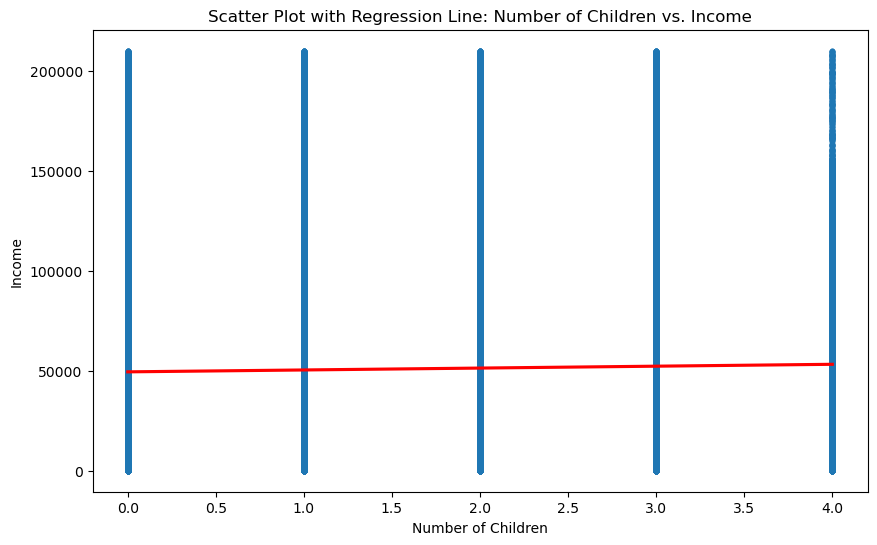

In [111]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Number of Children', y='Income', data=df, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('Scatter Plot with Regression Line: Number of Children vs. Income')
plt.xlabel('Number of Children')
plt.ylabel('Income')
plt.show()

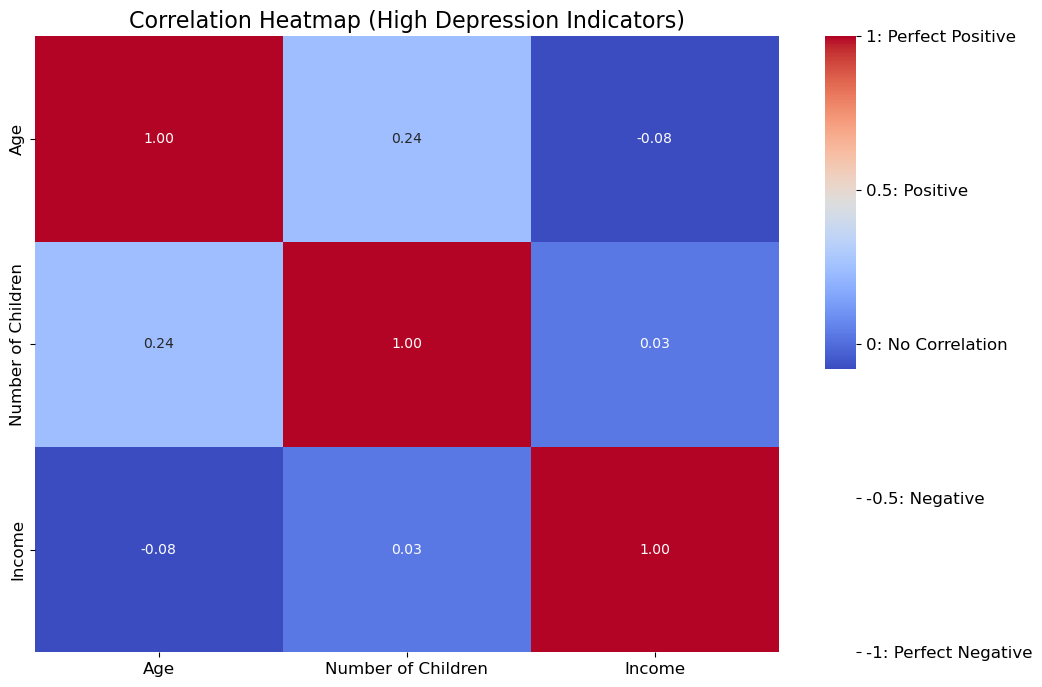

In [161]:
# Select only the numeric columns from the filtered data
numeric_df = high_depression_indicators_df.select_dtypes(include='number')

# Correlation Heatmap with improved labels and descriptions
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
heatmap.set_title('Correlation Heatmap (High Depression Indicators)', fontsize=16)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12)

# Add a legend with detailed descriptions
cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
cbar.set_ticklabels(['-1: Perfect Negative', '-0.5: Negative', '0: No Correlation', '0.5: Positive', '1: Perfect Positive'])
cbar.ax.tick_params(labelsize=12)  # Increase font size of color bar ticks

plt.show()